In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
print(x.shape)

(6, 1)


In [4]:
print(y.shape)

(6,)


In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

In [7]:
model.intercept_

5.633333333333329

In [8]:
model.coef_

array([0.54])

In [9]:
r_sq = model.score(x, y)
print(r_sq)

0.7158756137479542


In [10]:
y_pred = model.predict(x)
print(y_pred)

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [11]:
model.intercept_ + model.coef_ * x

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

In [12]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [13]:
y_new = model.predict(x_new)
print(y_new)

[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


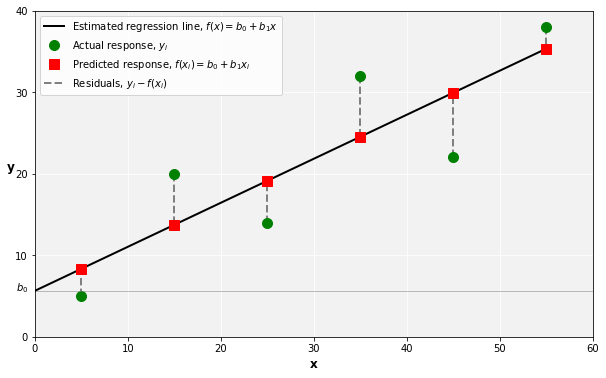

In [14]:
# Extra code added to visualize regression line
fig, ax = plt.subplots(figsize=(10, 6))

# plot regression line
regression_line, = ax.plot([0, *x.reshape(-1)], [model.intercept_, *y_pred], 'k', linewidth=2)

# plot residuals
residuals = []
for a, b, c in zip(x, y, y_pred):
    
    residuals.append(ax.plot([a, a], [b, c], '--', linewidth=2, color='gray'))

# plot actual response
response, = ax.plot(x, y, '.g', markersize=20)

# plot estimated response
predictions, = ax.plot(x, y_pred, 'sr', markersize=10)

# horizontal line at y = b_0
ax.plot([0, 60], [model.intercept_] * 2, color='gray', linewidth=0.5)

# axes labels, limits, and intercept
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('y', fontsize=12, fontweight='bold', rotation=0)
ax.set_ylim(0, 40)
ax.set_xlim(0, 60)
ax.text(-2, model.intercept_, r'$b_0$')
ax.set_yticks([0, 10, 20, 30, 40])

# legend, done manually because of residuals
ax.legend([regression_line, response, predictions, residuals[0][0]], 
          ['Estimated regression line, $f(x)=b_0+b_1x$',
           r'Actual response, $y_i$',
           r'Predicted response, $f(x_i)=b_0+b_1x_i$',
           r'Residuals, $y_i - f(x_i)$'
])

# styles
ax.set_facecolor((0.95, 0.95, 0.95))
ax.grid(color='white')


### Multiple Linear Regression

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
print(x.shape)
print(y.shape)

(8, 2)
(8,)


In [19]:
model = LinearRegression().fit(x, y)

In [20]:
r_sq = model.score(x, y)
print(r_sq)

0.8615939258756775


In [21]:
print(model.intercept_)
print(model.coef_)

5.52257927519819
[0.44706965 0.25502548]


In [22]:
y_est = model.predict(x)

In [23]:
y_est, y

(array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
        29.4660957 , 38.78227633, 41.27265006]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [24]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [25]:
model.predict(x_new)

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

### Polynomial Regression

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [28]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [29]:
x_ = transformer.fit_transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [30]:
model = LinearRegression().fit(x_, y)

In [31]:
print(model.intercept_)
print(model.coef_)

21.37232142857144
[-1.32357143  0.02839286]


In [32]:
r_sq = model.score(x_, y)
print(r_sq)

0.8908516262498563


In [33]:
y_est = model.predict(x_)
print(y - y_est)

[-0.46428571  3.09285714 -4.02857143 -1.82857143  5.69285714 -2.46428571]


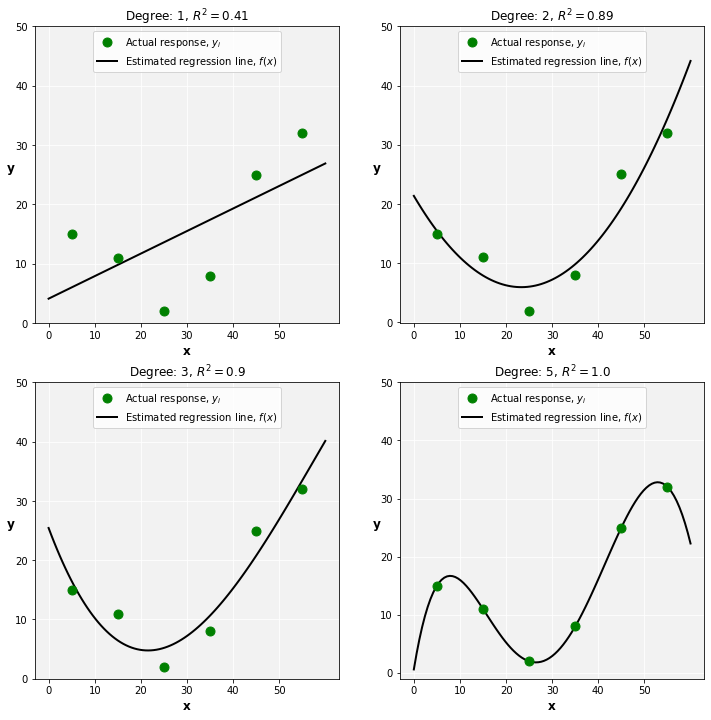

In [34]:
# Extra code included for visualizing polynomial regression
# Using observations x and y from test data and not
# from the article figures

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

transformers = []
degrees = [1, 2, 3, 5]
X_ = []
models = []

for k, degree in enumerate(degrees):
    
    transformers.append(PolynomialFeatures(degree=degree, include_bias=False))
    
    X_.append(transformers[k].fit_transform(x))
    
    models.append(LinearRegression().fit(X_[k] , y))

x_min, x_max = 0, 60
x_nodes = np.linspace(x_min, x_max, 101)
    
for k, ax in enumerate(axs.reshape(-1)):
    
    # responses
    ax.plot(x, y, '.g', markersize=18, label=r'Actual response, $y_i$', zorder=3)
    
    # get predicted values on a finer x-grid using the x_nodes array
    x_nodes_transformed = transformers[k].fit_transform(x_nodes.reshape(-1, 1))
    ax.plot(x_nodes, models[k].predict(x_nodes_transformed), 'k', 
            linewidth=2, label=r'Estimated regression line, $f(x)$', zorder=2)
    
    # legend
    ax.legend(loc='upper center')
    
    # title
    deg = f'Degree: {degrees[k]}, '
    R2 = r'$R^2 = $'
    score = str(round(models[k].score(X_[k], y), 2))
    ax.set_title(deg + R2 + score)
        
    # styles, etc.
    ax.set_yticks(range(x_min, x_max, 10))
    ax.set_xticks(range(x_min, x_max, 10))
    ax.grid(color='white')
    ax.set_facecolor((0.95, 0.95, 0.95))
    ax.set_xlabel('x', fontsize=12, fontweight='bold')
    ax.set_ylabel('y', fontsize=12, fontweight='bold', rotation=0)


### MultiPolynomial R

In [47]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x = np.array(x)
y = np.array(y)

In [48]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_)

[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [5.000e+00 1.000e+00 2.500e+01 5.000e+00 1.000e+00]
 [1.500e+01 2.000e+00 2.250e+02 3.000e+01 4.000e+00]
 [2.500e+01 5.000e+00 6.250e+02 1.250e+02 2.500e+01]
 [3.500e+01 1.100e+01 1.225e+03 3.850e+02 1.210e+02]
 [4.500e+01 1.500e+01 2.025e+03 6.750e+02 2.250e+02]
 [5.500e+01 3.400e+01 3.025e+03 1.870e+03 1.156e+03]
 [6.000e+01 3.500e+01 3.600e+03 2.100e+03 1.225e+03]]


In [50]:
model = LinearRegression().fit(x_, y)

In [51]:
print('r_sq = ', model.score(x_, y))

r_sq =  0.9453701449127822


In [52]:
print('b_0 =', model.intercept_)
print('[b_1, b_2, b_3, b_4, b_5] = ', model.coef_)

b_0 = 0.8430556452395876
[b_1, b_2, b_3, b_4, b_5] =  [ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
